In [1]:
import numpy as np
import scipy.stats as st

#importamos el fichero plot_prob.py que debe de estar en la misma
# carpeta que este cuaderno
from plot_prob import plot_samples_discrete, plot_discrete_dist, plot_cdf

# Variable aleatoria

Una variable aleatoria es una función que depende de un suceso aleatorio.

$$
X:\Omega\rightarrow \mathbb{R}
$$

donde hay una medida de probabilidad $P$ sobre el *espacio muestral* $\Omega$.

## Tipos de variables aleatorias

**Definición**: El **soporte** de una variable aleatoria es el conjunto de valores que puede tomar.

Las variables aleatorias se clasifican según su soporte:
  -  Un conjunto finito de valores (**variable aleatoria discreta y finita**).
  -  Un conjunto infinito, pero contable. Por ejemplo, los números naturales (**variable aleatoria discreta infinita**).
  -  Un conjunto continuo, como un intervalo de números reales, o el conjunto de todos los números reales (**variable aleatoria continua**).

Observad que lo importante son los posibles valores de la variable aleatoria, y no la distribución de probabilidad sobre el espacio muestral.

# Distribuciones de probabilidad

Una **distribución de probabilidad** es una descripción precisa de las probabilidades asociadas a los resultados de un experimento aleatorio.

Muchos sucesos aleatorios son bien conocidos y siguen una distribución de probabilidad que podemos encontrar en la wikipedia o en los libros de texto de probabilidad. Se les suele dar un nombre especial: (binomial, geométrica, gaussiana...).

 - **Uniforme**: El resultado del lanzamiento de un dado de seis caras; el último dígito del número de teléfono de una persona.
 - **Binomial**: En un crucero con n personas, anotamos cuántas personas de estas personas son celíacas.
 - **Geométrica**: Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - **Poisson**: Anotamos el número de fallos de un sistema en cada semana.
 - **Gaussiana (aprox)**: Anotamos el peso de peces de la misma especie (si pesamos peces de distintas categorías la distribución sería aproximadamente una *mezcla de gaussianas* (*gaussian mixture model*)).

Las distribuciones de probabilidad se clasifican según el espacio muestral sea:

 - Un conjunto finito (**distribución discreta finita**).
 - Un conjunto infinito, pero contable. Por ejemplo, los números naturales (**distribución discreta infinita**).
 - Un conjunto continuo, como un intervalo de números reales, o el conjunto de todos los números reales  (**distribución continua**).

Es importante entender esta distinción para poder manejarlas, incluso a nivel intuitivo.


Muchos sucesos aleatorios son bien conocidos y siguen una distribución de probabilidad que podemos encontrar en la wikipedia o en los libros de texto de probabilidad. Se les suele dar un nombre especial: (binomial, geométrica, gaussiana...).

 - **Uniforme**: El resultado del lanzamiento de un dado de seis caras; el último dígito del número de teléfono de una persona.
 - **Binomial**: En un crucero con n personas, anotamos cuántas personas de estas personas son celíacas.
 - **Geométrica**: Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - **Poisson**: Anotamos el número de fallos de un sistema en cada semana.
 - **Gaussiana (aprox)**: Anotamos el peso de peces de la misma especie (si pesamos peces de distintas categorías la distribución sería aproximadamente una *mezcla de gaussianas* (*gaussian mixture model*)).

## Distribuciones y variables aleatorias discretas

En esta clase vamos a centrarnos en distribuciones de probabilidad discretas, y lo primero que vamos a hacer es intentar entender la relación entre la ley de distribución de probabilidad, y las frecuencias con las que nos encontramos cada posible resultado.


### Distribución de Bernoulli

Un experimento aleatorio *sigue una distribución de Bernoulli* si hay dos posibles resultados:

  - 0: con probabilidad 1-p
  - 1: con probabilidad p


Cualquier experimento aleatorio con dos resultados se puede representar mediante una distribución de Bernouilli asignando a uno de los dos posibles resultados el valor 0 y al otro, el valor 1:

  - Hacemos una salida con el barco, anotamos "1" si vemos algún cetáceo, "0" en otro caso. Si la probabilidad de avistamiento es del 5%, es una Bernoulli con p=0,05.
  - En cada día de operación, anotamos "**1**" si el sistema de comunicación *falla*, "0" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,1.
  - En cada día de operación, anotamos "**0**" si el sistema de comunicación *falla*, "1" si funciona. Si la probabilidad de fallo es del 10%, es una Bernoulli con p=0,9.

In [2]:
#La distribución depende de un parametro
p0 = 0.25
#El objeto Ber contiene los metodos asociados a una 
#distribucion concreta de la familia Bernoulli
Ber = st.bernoulli(p=p0)

La **función de masa** de una distribución de probabilidad indica la probabilidad de obtener cada posible resultado.

``Ber.pmf(0)`` es la probabilidad de obtener ``0`` y ``Ber.pmf(1)`` es la probabilidad de obtener ``1``.

In [3]:
#Usando Ber.pmf, podemos ver cuál es la probabilidad de 
#obtener 0, o de obtener 1
print(Ber.pmf(0), Ber.pmf(1))

0.75 0.25


In [4]:
Ber.pmf(2)

0.0

In [5]:
# Esta función dibuja la función de masa como diagrama de barras
plot_discrete_dist(Ber)

Una extracción aleatoria de la distribución nos devuelve un número aleatorio en el espacio muestral de la distribución, pero de tal forma que cuando hacemos muchas extracciones cada resultado aparece una proporción de veces parecida a la probabilidad que le asigna la funcion de masa.

``Ber.rvs(N)`` devuelve un array con ``N`` extracciones aleatorias independientes de la distribución ``Ber`` (una *muestra*).

In [6]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = Ber.rvs(20)
muestra

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [7]:
# ATENCION: no hay que fijar la semilla aleatoria con random.seed, 
#sino con np.random.seed(semilla)
#random.seed(12)
np.random.seed(12)
muestra = Ber.rvs(20)
muestra

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

### Distribución binomial

Tenemos un experimento de Bernoulli con probabilidad **p**:

  - 0, con probabilidad 1-p
  - 1, con probabilidad p

**Repetimos el experimento** **n** veces de forma independiente, y anotamos *cuántas veces hemos ganado*.

El **espacio muestral** son los números naturales entre 0 y n.

Depende de dos parámetros:
 - La probabilidad **p** de ganar cada juego individual.
 - El número total de veces **n** que jugamos.

Puedes encontrar más información sobre la [distribución binomial en la wikipedia](https://en.wikipedia.org/wiki/Binomial_distribution)

In [8]:
#La distribución depende de dos parametros
p0 = 0.2
n0 = 10
#El objeto B contiene los metodos asociados a una distribucion concreta de la familia binomial
B = st.binom(n=n0, p=p0)

``B.rvs(n)`` devuelve un array con n extracciones aleatorias independientes de la distribución ``B``.

In [9]:
#Cada vez que ejecutas esta celda, el resultado varía
muestra = B.rvs(20)
muestra

array([3, 0, 1, 1, 1, 2, 2, 3, 1, 3, 3, 1, 1, 5, 2, 4, 3, 3, 2, 2])

La **función de masa** de la distribución binomial indica la probabilidad de ganar 0, 1, 2 ... hasta el máximo de **n** veces.

Si ``B`` es la distribución, ``B.pmf(k)`` es la probabilidad del valor ``k``.

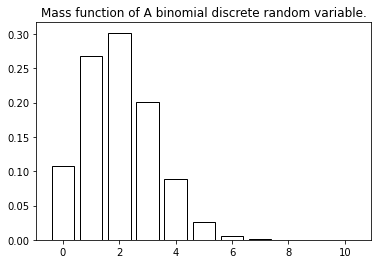

In [10]:
plot_discrete_dist(B, span=(0,10))

La __función de distribución__ $F_D$ de una distribución de probabilidad $D$ se define como:

 - $F_D(t) = P(D \leq t)$, para cualquier $t\in\mathbb{R}$
 
Es una función no decreciente, aunque puede ser constante en ciertos intervalos. Para distribuciones discretas, siempre es constante en los intervalos abiertos (n,n+1), para un entero n, y tiene una discontinuidad de salto en algunos enteros:

In [11]:
for k in range(1,11):
    print('F_B(%s) = P(B <= %s) = %s'%(k, k, B.cdf(k)))

F_B(1) = P(B <= 1) = 0.3758096384000002
F_B(2) = P(B <= 2) = 0.6777995263999999
F_B(3) = P(B <= 3) = 0.8791261183999999
F_B(4) = P(B <= 4) = 0.9672065024
F_B(5) = P(B <= 5) = 0.9936306176
F_B(6) = P(B <= 6) = 0.9991356416
F_B(7) = P(B <= 7) = 0.9999220736
F_B(8) = P(B <= 8) = 0.9999958016
F_B(9) = P(B <= 9) = 0.9999998976
F_B(10) = P(B <= 10) = 1.0


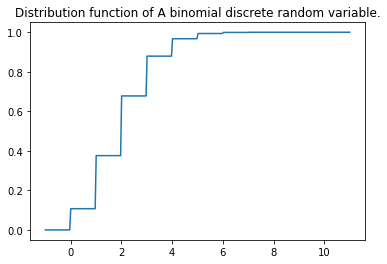

In [12]:
plot_cdf(B, span=(-1,10))

### Distribución geométrica

Repetimos un experimento aleatorio de Bernoulli que ofrece dos resultados:
  - 0, con probabilidad 1-p
  - 1, con probabilidad p

tantas veces como sea necesario, *de forma independiente*, hasta obtener "1" por primera vez, y anotamos cuántas veces hemos realizado el experimento (contando la última vez, que hemos obtenido "1").

Los posibles valores son los números positivos mayores que 1 => discreta infinita.

Depende de un uńico parámetro:
 - La probabilidad **p** de obtener un "1".
 
Ejemplos:
 - Lanzamos una moneda hasta obtener cara por primera vez.
 - Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - Anotamos el número de días que un sistema ha funcionado sin averías entre dos reparaciones.
 

[Distribución geométrica en la wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution).

In [13]:
p0 = 0.1
G = st.geom(p=p0)

In [14]:
#Muestras aleatorias
muestra = G.rvs(10)
muestra

array([ 5, 51,  2, 32,  6,  6,  6,  5,  6,  1])

Valores de la función de masa para los números de 1 a 10

In [15]:
for k in range(1,11):
    print('P(G = %s) = %s'%(k, G.pmf(k)))

P(G = 1) = 0.1
P(G = 2) = 0.09000000000000001
P(G = 3) = 0.08100000000000002
P(G = 4) = 0.0729
P(G = 5) = 0.06561
P(G = 6) = 0.05904900000000001
P(G = 7) = 0.05314410000000001
P(G = 8) = 0.04782969000000001
P(G = 9) = 0.04304672100000001
P(G = 10) = 0.03874204890000001


Una gráfica de la función de masa

In [16]:
plot_discrete_dist(G)

La __función de distribución__ $F_G$ de una distribución geométrica:

In [17]:
for k in range(1,11):
    print('F_G(%s) = P(G <= %s) = %s'%(k, k, G.cdf(k)))

F_G(1) = P(G <= 1) = 0.1
F_G(2) = P(G <= 2) = 0.19
F_G(3) = P(G <= 3) = 0.271
F_G(4) = P(G <= 4) = 0.3439
F_G(5) = P(G <= 5) = 0.40951000000000004
F_G(6) = P(G <= 6) = 0.468559
F_G(7) = P(G <= 7) = 0.5217031
F_G(8) = P(G <= 8) = 0.56953279
F_G(9) = P(G <= 9) = 0.6125795110000001
F_G(10) = P(G <= 10) = 0.6513215599000001


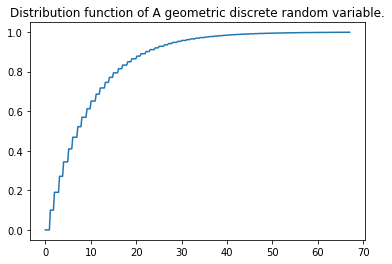

In [18]:
plot_cdf(G)

## Ejercicio resuelto

La probabilidad de que un bit enviado en una transmisión digital se reciba con error es 0.1. Calcular la probabilidad de que se hayan recibido exactamente 4 bits erróneos en la transmisión número 10.

 - Sólo hay dos opciones para la recepción de un bit: correcta o incorrecta. Si codificamos $B_1 = 0$ para una transmisión correcta del primer bit y 1 a una incorrecta, vemos que $B_1$ sigue una distribución de Bernouilli con parámetro p=0.1.
 - Cada bit se recibe correctamente de forma independiente al resto, luego el número total de bit erróneos T sigue una distribución binomial, con parámetros n=10 y p=0.1.
 - Podemos escribir $T=B_1+\dots+B_{10}$

In [19]:
# Definimos B, variable aleatoria que sigue una distribución
# Binomial(n=10, p=0.1)
T = st.binom(n=10, p=0.1)

 - "la probabilidad de que se hayan recibido _exactamente_ 4 bits erróneos en la transmisión número 10" es la probabilidad de que T valga 4.
 - P(T=4) es también la función de masa evaluada en 4:

In [20]:
T.pmf(4)

0.01116026100000001

10. En cierta región, la probabilidad de que ocurra una tormenta con truenos en un determinado dı́a es de 0.1. Suponiendo independencia de un dı́a con otro, y contando a partir del 1 de julio, cuál es la probabilidad de que la primera tormenta se produzca el 3 de agosto.

 - En el día j, sólo puede haber tormenta (lo codificamos como $T_j=1$), o no haberla (lo codificamos como $T_j=0$). Sigue una distribución de Bernouilli con parámetro 0.1 (que es $P(T_j=1)$)
 - Si contamos el número de días $N$ sin tormenta hasta la primera tormenta, sigue una distribución geométrica: $N\sim Geom(p=0.1)$
 - Nos piden la probabilidad de que N sea 31+3 (31 días de julio y uno de agosto)

In [21]:
N = st.geom(p=0.1)
N.pmf(34)

0.003090315438263264

## Glosario en inglés

 - **distribución de probabilidad**: *probability distribution*
 - **variable aleatoria**: *random variable*
 - **muestra aleatoria**: *random sample*
 - **función de masa**: *probability mass function*
 - **función de distribución**: *cumulative distribution function*
 - **independiente**: *independent*